In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor

## EDA

In [ ]:
tiktok = pd.read_csv('tiktok.csv')

In [ ]:
tiktok.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,...,0.3120,0.0461,0.0,0.1800,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.0628,0.0564,0.0,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE
2,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.0628,0.0564,0.0,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE
3,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),4qXC0i02bSFstECuXP2ZpL,Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,2020-12-04,76,0.571,0.767,...,0.2870,0.3360,0.0,0.0809,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,1dIWPXMX4kRHj6Dt2DStUQ,2.694733,TIKTOK DANCE
4,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),2ZRQcIgzPCVaT9XKhXZIzh,Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,2018-08-03,72,0.548,0.839,...,0.0644,0.1350,0.0,0.1020,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,4QVS8YCpK71R4FsxSMCjhP,3.638250,TIKTOK DANCE


### Data Cleaning

In [ ]:
# Drop the unneccesary columns
tiktok = tiktok.drop('artist_id', axis=1)
tiktok = tiktok.drop('playlist_id', axis=1)

# Drop duplicate track_id
df=tiktok.drop_duplicates(subset=['track_id']).copy()

### Descriptive Statistics

In [ ]:
# General info about the dataset
print(df.info())

# Display the columns of the dataset
print(df.columns)
# Display the first few rows of the dataset
display(df.head())

# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include=['O']))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3560 entries, 0 to 6743
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          3560 non-null   object 
 1   track_name        3560 non-null   object 
 2   artist_name       3560 non-null   object 
 3   album_id          3560 non-null   object 
 4   duration          3560 non-null   int64  
 5   release_date      3560 non-null   object 
 6   popularity        3560 non-null   int64  
 7   danceability      3560 non-null   float64
 8   energy            3560 non-null   float64
 9   key               3560 non-null   int64  
 10  loudness          3560 non-null   float64
 11  mode              3560 non-null   int64  
 12  speechiness       3560 non-null   float64
 13  acousticness      3560 non-null   float64
 14  instrumentalness  3560 non-null   float64
 15  liveness          3560 non-null   float64
 16  valence           3560 non-null   float64


,track_id,track_name,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_name,duration_mins,genre
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,1,...,0,0.3120,0.0461,0.000000,0.1800,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,8,...,1,0.0628,0.0564,0.000000,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE
3,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,2020-12-04,76,0.571,0.767,2,...,1,0.2870,0.3360,0.000000,0.0809,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,2.694733,TIKTOK DANCE
4,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,2018-08-03,72,0.548,0.839,6,...,1,0.0644,0.1350,0.000000,0.1020,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,3.638250,TIKTOK DANCE
5,7BoobGhD4x5K96Me0hqC8Q,Build a Bitch,Bella Poarch,5YKqfiQdPYWJ0kZ5pttY5o,122772,2021-05-14,89,0.855,0.463,3,...,1,0.0367,0.2170,0.000018,0.3470,0.866,102.931,7BoobGhD4x5K96Me0hqC8Q,2.046200,TIKTOK DANCE


            duration   popularity  danceability       energy          key  \
count    3560.000000  3560.000000   3560.000000  3560.000000  3560.000000   
mean   194770.595225    50.539326      0.727608     0.637238     5.217978   
std     60734.615079    24.731639      0.139193     0.181434     3.663910   
min     43426.000000     0.000000      0.150000     0.023700     0.000000   
25%    155754.000000    35.000000      0.648000     0.516000     1.000000   
50%    186088.000000    55.000000      0.743000     0.643000     5.000000   
75%    222957.750000    70.000000      0.830000     0.775000     8.000000   
max    716206.000000   100.000000      0.990000     0.999000    11.000000   

          loudness         mode  speechiness  acousticness  instrumentalness  \
count  3560.000000  3560.000000  3560.000000   3560.000000       3560.000000   
mean     -6.966714     0.590169     0.135926      0.211404          0.040459   
std       2.997190     0.491872     0.127687      0.235720        

### Top tracks

In [ ]:
px.bar(df['track_name'].value_counts().nlargest(30))

### Top Artist

In [ ]:
px.bar(df['artist_name'].value_counts().nlargest(30))

### Top Genre

In [ ]:
px.bar(df['genre'].value_counts().nlargest(30))

### Top 10 Popularity songs

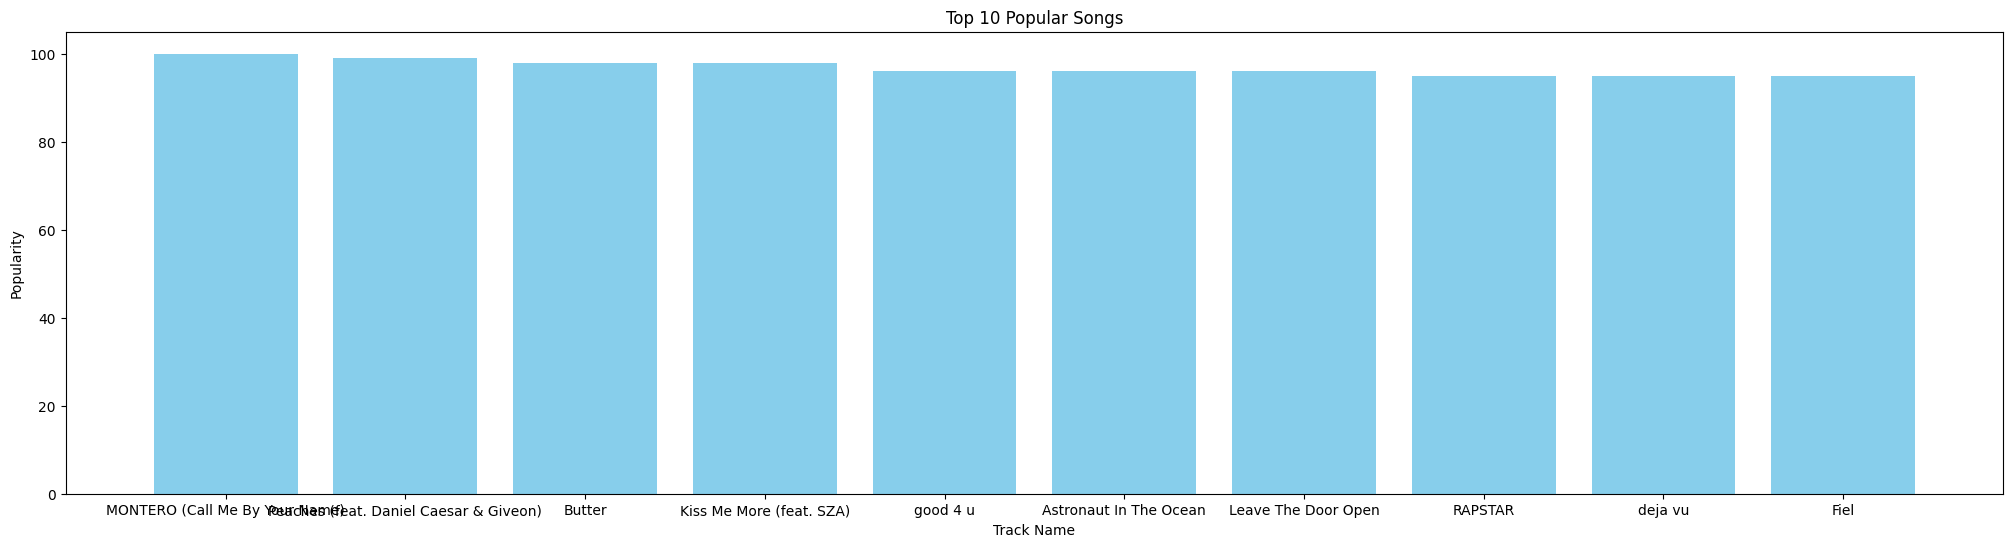

In [ ]:
top_songs = df.sort_values(by='popularity', ascending=False).head(10)

# Create bar plot
plt.figure(figsize=(25, 6))
plt.bar(top_songs['track_name'], top_songs['popularity'], color='skyblue')
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Songs')
plt.show()

### Correlation

In [ ]:
corr=df.drop(columns=['track_id', 'track_name', 'duration','artist_name']).corr()
corr

<ipython-input-18-e550ee56d369>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
popularity,1.000000,-0.119423,-0.026048,0.010017,0.118165,-0.023863,-0.019958,0.055945,-0.091345,-0.014005,-0.089154,-0.041271,0.017782
danceability,-0.119423,1.000000,0.023514,-0.001957,0.046945,-0.019575,0.224665,-0.206664,-0.036957,-0.104867,0.369868,-0.036485,-0.140237
energy,-0.026048,0.023514,1.000000,0.059437,0.701621,-0.073594,-0.156154,-0.464094,0.036982,0.138352,0.348709,0.139604,0.060112
key,0.010017,-0.001957,0.059437,1.000000,0.038530,-0.155126,-0.016591,-0.010262,0.015237,0.008974,0.061948,0.019440,-0.002920
loudness,0.118165,0.046945,0.701621,0.038530,1.000000,-0.039525,-0.155879,-0.321092,-0.114500,0.075453,0.227410,0.084291,0.038985
mode,-0.023863,-0.019575,-0.073594,-0.155126,-0.039525,1.000000,0.006054,0.037525,-0.020531,-0.012419,-0.025058,0.011521,0.023467
speechiness,-0.019958,0.224665,-0.156154,-0.016591,-0.155879,0.006054,1.000000,-0.076056,-0.112470,-0.001981,0.040676,0.126752,-0.232800
acousticness,0.055945,-0.206664,-0.464094,-0.010262,-0.321092,0.037525,-0.076056,1.000000,0.047427,-0.064558,-0.132815,-0.143629,0.049735
instrumentalness,-0.091345,-0.036957,0.036982,0.015237,-0.114500,-0.020531,-0.112470,0.047427,1.000000,0.002813,-0.042446,-0.002046,0.017555
liveness,-0.014005,-0.104867,0.138352,0.008974,0.075453,-0.012419,-0.001981,-0.064558,0.002813,1.000000,0.029880,0.002437,0.004522


In [ ]:
px.imshow(corr, color_continuous_scale='piyg', color_continuous_midpoint=0)

### Violin Plot

In [ ]:
var_cols=['track_id', 'track_name',
#           'artist_id', 'artist_name', 'album_id',
#        'duration',
          'popularity', 'danceability', 'energy',
#        'key',
          'loudness',
#           'mode',
          'speechiness', 'acousticness',
#        'instrumentalness',
          'liveness', 'valence', 'tempo',
#           'playlist_id', 'playlist_name',
          'duration_mins',
#           'genre'
         ]
df_melt=pd.melt(df[var_cols], id_vars=['track_id', 'track_name'])
df_melt

fig = px.violin(df_melt, y="value", facet_col="variable", color="variable", facet_col_wrap=4, facet_row_spacing=0.12,
    facet_col_spacing=0.07,)
fig.update_yaxes(matches=None, showticklabels=True,)
fig.update_xaxes(matches=None, showticklabels=True,)

fig

### VIF

In [ ]:
num_vars = ['popularity', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins']
X = df[num_vars]

# Drop any rows with NaN values
X = X.dropna()

# Calculate VIF
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

            features        VIF
0         popularity   4.962520
1       danceability  21.607047
2             energy  17.543266
3                key   3.065895
4               mode   2.457687
5        speechiness   2.511407
6       acousticness   2.068911
7   instrumentalness   1.102366
8           liveness   2.770190
9            valence   8.258001
10             tempo  19.077360
11     duration_mins  10.536003


## Model Building -- using sklearn

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

### Drop unnecessary columns and split the data

In [ ]:
# Drop unnecessary columns
df = df.drop(['track_id', 'track_name', 'artist_name', 'album_id', 'duration', 'release_date', 'duration_mins'], axis=1)

# Convert categorical variables into dummy/indicator variables if needed
df = pd.get_dummies(df)

# Split the data into features (X) and target (y)
X = df.drop('popularity', axis=1)
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing set
X_test_scaled = scaler.transform(X_test)

### Train the Models
- Linear Regression
- Random Forest
- Support Vector Machine
- Neural Network

In [ ]:
# Initialize models
linear_regression = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
svm = SVR(kernel='linear')
neural_network = MLPRegressor(random_state=42)

# Train and evaluate Linear Regression
linear_regression.fit(X_train_scaled, y_train)
linear_regression_pred = linear_regression.predict(X_test_scaled)
linear_regression_mse = mean_squared_error(y_test, linear_regression_pred)

# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)

# Train and evaluate SVM
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_mse = mean_squared_error(y_test, svm_pred)

# Train and evaluate Neural Network
neural_network.fit(X_train_scaled, y_train)
neural_network_pred = neural_network.predict(X_test_scaled)
neural_network_mse = mean_squared_error(y_test, neural_network_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



### Model Selection

In [ ]:
mse_values = {
    'Linear Regression': linear_regression_mse,
    'Random Forest': random_forest_mse,
    'SVM': svm_mse,
    'Neural Network': neural_network_mse
}

best_model = min(mse_values, key=mse_values.get)
print("Mean Squared Error:")
for model, mse in mse_values.items():
    print(f"{model}: {mse}")

print("\nBest Model:", best_model)

Mean Squared Error:
Linear Regression: 2.7700263297631334e+29
Random Forest: 491.32186797752814
SVM: 482.6253620032288
Neural Network: 915.1331921438068

Best Model: SVM


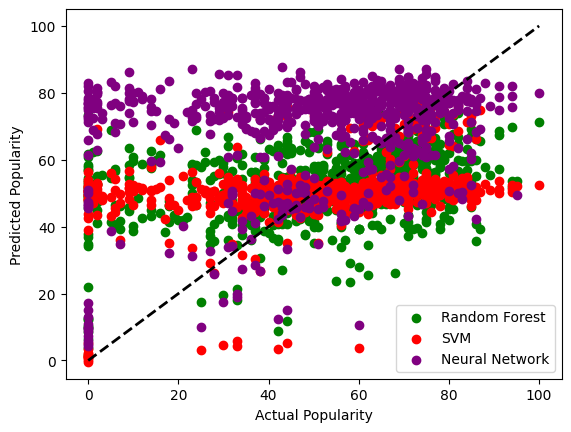

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot for each model
# Exclude Linear Regression as its MSE is way too larger
plt.scatter(y_test, random_forest_pred, color='green', label='Random Forest')
plt.scatter(y_test, svm_pred, color='red', label='SVM')
plt.scatter(y_test, neural_network_pred, color='purple', label='Neural Network')

# Plot the identity line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', linewidth=2)

# Set plot labels and legend
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.legend()

# Display the plot
plt.show()


## Model Building -- using PySpark
- Logistic Regression
- Random Forest
- One-vs-Rest (OVR) with Logistic Regression as the base classifier

### PySpark Initialization

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #Install java
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz ## Install Apache Spark
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder, StandardScaler, Bucketizer
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, LinearSVC, OneVsRest
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [ ]:
spark = SparkSession.builder.getOrCreate()

### Data Import and Preprocessing

In [ ]:
# Load the dataset
df = spark.read.csv('tiktok.csv', header=True, inferSchema=True)

# Drop unnecessary columns
drop_columns = ['artist_id', 'playlist_id', 'track_id', 'track_name', 'album_id', 'duration', 'release_date']
df = df.drop(*drop_columns)

# Convert categorical variables into numerical using StringIndexer and OneHotEncoder
categorical_columns = ['artist_name','genre', 'playlist_name']
indexers = [StringIndexer(inputCol=column, outputCol=f"{column}_index", handleInvalid="keep") for column in categorical_columns]
encoders = [OneHotEncoder(inputCol=f"{column}_index", outputCol=f"{column}_encoded") for column in categorical_columns]

# Define the features column
feature_columns = ['duration_mins', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                   'instrumentalness', 'liveness', 'valence', 'tempo'] + [f"{column}_encoded" for column in categorical_columns]

# Combine all transformations into a single pipeline
pipeline = Pipeline(stages=indexers + encoders)

# Fit the pipeline to the data
pipeline_model = pipeline.fit(df)

# Apply the transformations to the data
df_transformed = pipeline_model.transform(df)

# Define the bin boundaries for the popularity ranges
splits = [0, 20, 40, 60, 80, 100]

# Create the Bucketizer transformer
bucketizer = Bucketizer(splits=splits, inputCol='popularity', outputCol='label')

# Apply the Bucketizer to the data
df_bucketized = bucketizer.transform(df_transformed)

# Create the feature vector using VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
df_features = assembler.transform(df_bucketized).select('features', 'label')

# Scale the features using StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures', withMean=True, withStd=True)
scaled_data = scaler.fit(df_features).transform(df_features)

# Split the data
train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)

### Train and Evaluate Models

In [ ]:
# Multi-class Logistic Regression model
lr = LogisticRegression(labelCol='label', featuresCol='features', maxIter=10)
lr_pipeline = Pipeline(stages=[lr])
lr_model = lr_pipeline.fit(train_data)
lr_predictions = lr_model.transform(test_data)
lr_accuracy = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy').evaluate(lr_predictions)

# Random Forest model for classification
rf = RandomForestClassifier(labelCol='label', featuresCol='features', seed=42)
rf.setNumTrees(500)
rf_pipeline = Pipeline(stages=[rf])
rf_model = rf_pipeline.fit(train_data)
rf_predictions = rf_model.transform(test_data)
rf_accuracy = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy').evaluate(rf_predictions)

# One-vs-Rest (OVR) classifier with Logistic Regression as the base classifier
svm = LinearSVC(labelCol='label', featuresCol='features')
ovr = OneVsRest(classifier=svm, labelCol='label', featuresCol='features')
ovr_pipeline = Pipeline(stages=[ovr])
ovr_model = ovr_pipeline.fit(train_data)
ovr_predictions = ovr_model.transform(test_data)
ovr_accuracy = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy').evaluate(ovr_predictions)

In [ ]:
print(f"Multi-class Logistic Regression Accuracy: {round(lr_accuracy*100,2)}%")
print(f"Random Forest Classifier Accuracy: {round(rf_accuracy*100,2)}%")
print(f"OVR Classifier Accuracy: {round(ovr_accuracy*100,2)}%")

Multi-class Logistic Regression Accuracy: 75.19%
Random Forest Classifier Accuracy: 42.33%
OVR Classifier Accuracy: 75.04%


### Fine Tune the Model

In [ ]:
# Hyperparameter tuning for Logistic Regression
lr = LogisticRegression(labelCol='label', featuresCol='features', maxIter=10)

lr_param_grid = (ParamGridBuilder()
                 .addGrid(lr.regParam, [0.1, 0.01])
                 .addGrid(lr.elasticNetParam, [0.0, 0.5])
                 .build())

lr_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')

lr_crossval = CrossValidator(estimator=lr,
                             estimatorParamMaps=lr_param_grid,
                             evaluator=lr_evaluator,
                             numFolds=5)

lr_model = lr_crossval.fit(train_data)
lr_best_model = lr_model.bestModel
lr_predictions = lr_best_model.transform(test_data)
lr_accuracy = lr_evaluator.evaluate(lr_predictions)

# Hyperparameter tuning for Random Forest
rf = RandomForestClassifier(labelCol='label', featuresCol='features', seed=42)

rf_param_grid = (ParamGridBuilder()
                 .addGrid(rf.numTrees, [100, 200])
                 .addGrid(rf.maxDepth, [5, 10])
                 .build())

rf_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')

rf_crossval = CrossValidator(estimator=rf,
                             estimatorParamMaps=rf_param_grid,
                             evaluator=rf_evaluator,
                             numFolds=5)

rf_model = rf_crossval.fit(train_data)
rf_best_model = rf_model.bestModel
rf_predictions = rf_best_model.transform(test_data)
rf_accuracy = rf_evaluator.evaluate(rf_predictions)

# Hyperparameter tuning for One-vs-Rest (OVR) classifier
svm = LinearSVC(labelCol='label', featuresCol='features')
ovr = OneVsRest(classifier=svm, labelCol='label', featuresCol='features')
ovr_pipeline = Pipeline(stages=[ovr])

ovr_param_grid = (ParamGridBuilder()
                  .addGrid(svm.regParam, [0.1, 0.01])
                  .addGrid(svm.maxIter, [10, 20])
                  .build())

ovr_evaluator = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')

ovr_crossval = CrossValidator(estimator=ovr_pipeline,
                              estimatorParamMaps=ovr_param_grid,
                              evaluator=ovr_evaluator,
                              numFolds=5)

ovr_model = ovr_crossval.fit(train_data)
ovr_best_model = ovr_model.bestModel.stages[0]
ovr_predictions = ovr_best_model.transform(test_data)
ovr_accuracy = ovr_evaluator.evaluate(ovr_predictions)

In [ ]:
print(f"Logistic Regression Best Accuracy: {round(lr_accuracy*100,2)}%")
print(f"Random Forest Best Accuracy: {round(rf_accuracy*100,2)}%")
print(f"OVR Classifier Accuracy: {round(ovr_accuracy*100,2)}%")

Logistic Regression Best Accuracy: 75.35%
Random Forest Best Accuracy: 42.33%
OVR Classifier Accuracy: 75.04%


### Visualize the results

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Extract the predicted and actual labels and compute the confusion matrix
# Logistic Regression
predicted_labels_lr = lr_predictions.select('prediction').rdd.map(lambda x: x[0]).collect()
actual_labels_lr = lr_predictions.select('label').rdd.map(lambda x: x[0]).collect()
cm_lr = confusion_matrix(actual_labels_lr, predicted_labels_lr)

# Random Forest
predicted_labels_rf = rf_predictions.select('prediction').rdd.map(lambda x: x[0]).collect()
actual_labels_rf = rf_predictions.select('label').rdd.map(lambda x: x[0]).collect()
cm_rf = confusion_matrix(actual_labels_rf, predicted_labels_rf)

# OVR
predicted_labels_ovr = ovr_predictions.select('prediction').rdd.map(lambda x: x[0]).collect()
actual_labels_ovr = ovr_predictions.select('label').rdd.map(lambda x: x[0]).collect()
cm_ovr = confusion_matrix(actual_labels_ovr, predicted_labels_ovr)

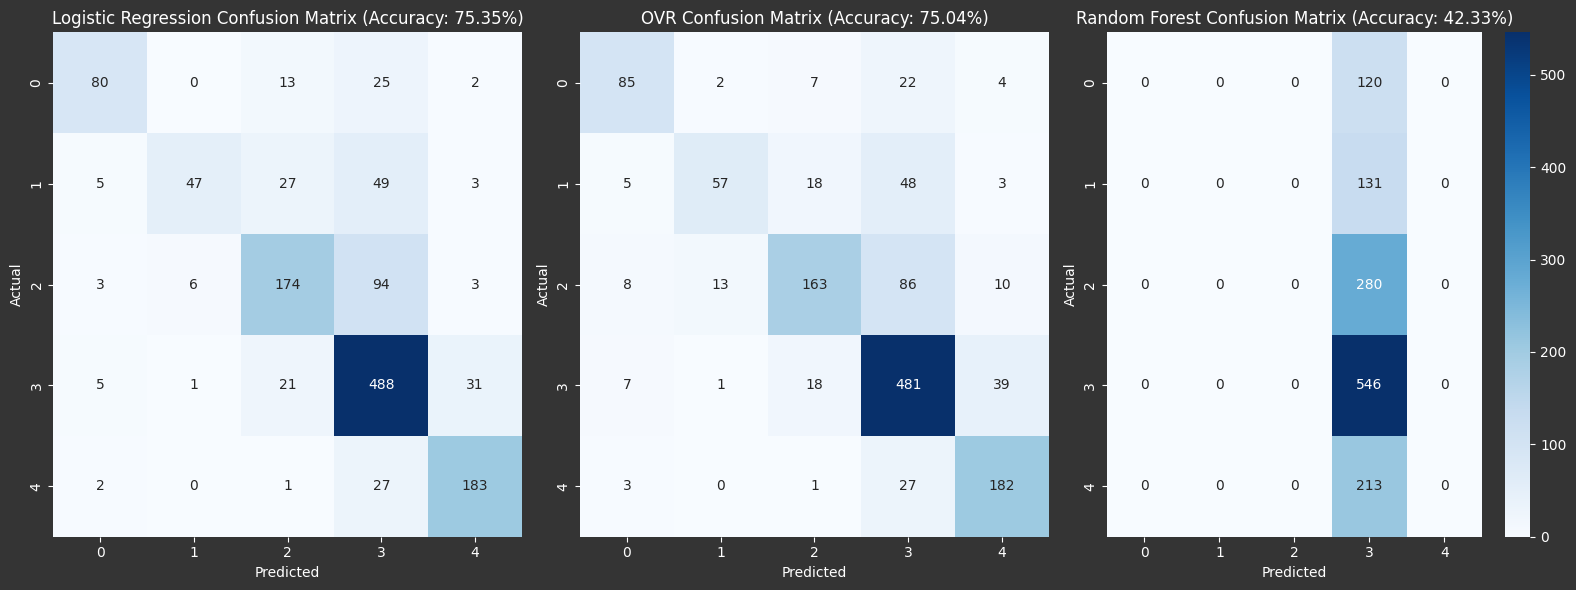

In [ ]:
with plt.style.context('dark_background'):
  fig, axes = plt.subplots(1, 3, figsize=(16, 6))

  # Plot the confusion matrix for Linear Regression
  sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[0])
  axes[0].set_xlabel('Predicted')
  axes[0].set_ylabel('Actual')
  axes[0].set_title('Logistic Regression Confusion Matrix (Accuracy: 75.35%)')

  # Plot the confusion matrix for OVR
  sns.heatmap(cm_ovr, annot=True, cmap='Blues', fmt='d', cbar=False, ax=axes[1])
  axes[1].set_xlabel('Predicted')
  axes[1].set_ylabel('Actual')
  axes[1].set_title('OVR Confusion Matrix (Accuracy: 75.04%)')

  # Plot the confusion matrix for Random Forest
  sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', ax=axes[2])
  axes[2].set_xlabel('Predicted')
  axes[2].set_ylabel('Actual')
  axes[2].set_title('Random Forest Confusion Matrix (Accuracy: 42.33%)')

  # Adjust the spacing between subplots
  plt.tight_layout()
  plt.gcf().set_facecolor('#343434')

  # Show the plot
  plt.show()

Since the Logistic Regression Model performs the better than Random Forest and similarly to OVR, and it's of a higher training efficiency than OVR, we decide to use Logistic Regression as our predictive model.

### Visualize the importance of Features

In [ ]:
def vis(index_number, class_name):
  coefficients = lr_best_model.coefficientMatrix.toArray()[index_number]
  feature_names = assembler.getInputCols()

  # Create a dictionary to store aggregated coefficients for each group
  aggregated_coefficients = {}

  # Group the dummy variables and aggregate the coefficients
  for feature_name, coefficient in zip(feature_names, coefficients):
      group_name = feature_name.split('_')[0]
      if group_name in aggregated_coefficients:
          aggregated_coefficients[group_name] += coefficient
      else:
          aggregated_coefficients[group_name] = coefficient

  # Extract the group names and aggregated coefficients
  group_names = list(aggregated_coefficients.keys())
  group_coefficients = list(aggregated_coefficients.values())
  group_odds = np.exp(group_coefficients)

  with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(7, 5))

    x = np.arange(len(group_names))
    ax.bar(x, group_odds)
    ax.set_xticks(x)
    ax.set_yticks(np.linspace(0,4,9))
    ax.set_xticklabels(group_names, rotation=45)
    ax.axhline(y=1, color='g', linestyle='--')
    ax.set_ylabel('Aggregated Odds-Ratio')
    ax.set_title(f'Aggregated Odds-Ratio of Features for {class_name} Popularity')
    plt.ylim(0,3)
    plt.gcf().set_facecolor('#343434')

    plt.show()

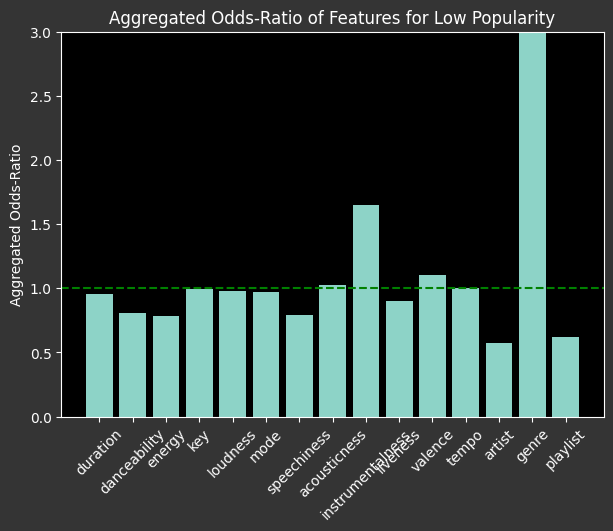

In [ ]:
vis(0, 'Low')

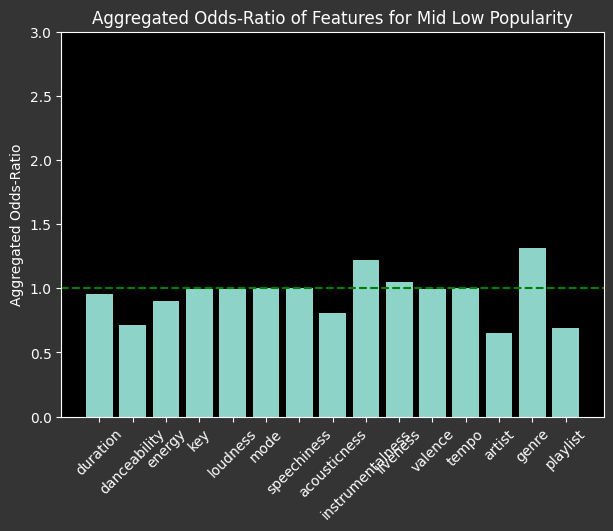

In [ ]:
vis(1,'Mid Low')

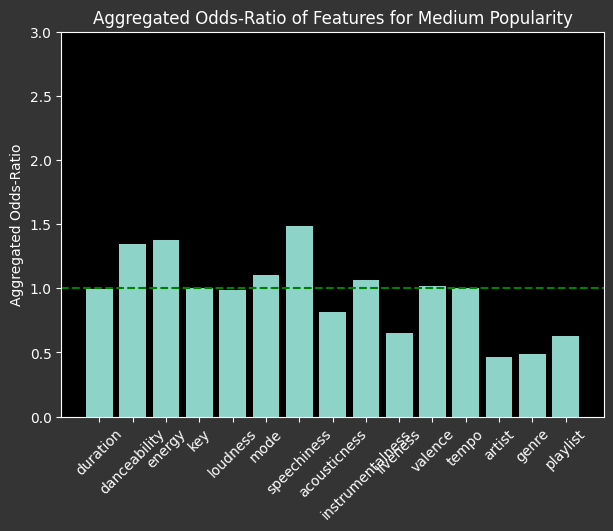

In [ ]:
vis(2,'Medium')

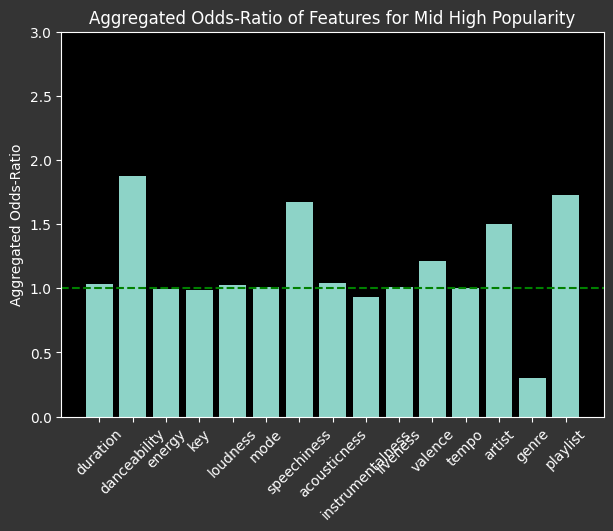

In [ ]:
vis(3,'Mid High')

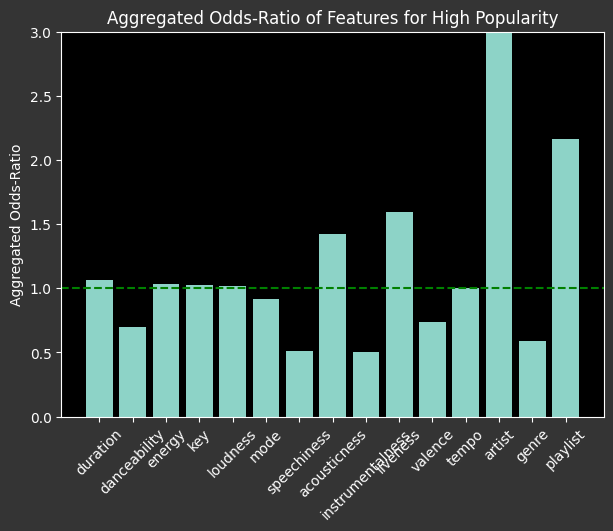

In [ ]:
vis(4,'High')